# Upper-Confidence-Bound Action Selection

$\epsilon$-greedy action selection forces the non-greedy actions to be tried, but indiscriminately, with no preference for those that are nearly greedy or particularly uncertain.

So to make in considerations the potential for the non-greedy actions for being optimal, we make a selection from these non-greedy actions based on their potential of being maximal and the uncertainties about their estimates.

To acheive this we can make the selection of the actions based on this equation:

$$ A_{t} = argmax_{a} [ Q_{t}(a) + c*\sqrt\frac{lnt}{N_{t}(a)}   ] $$ 

$ lnt $ denotes the natural logrithm of $ t $.

$N_{t}(a)$ denotes the number of times that action $a$ has been selected prior to time $ t $.

$ c $ degree of exploration.

## Intuition

The term $ c*\sqrt\frac{lnt}{N_{t}(a)} $ reflect the uncertainty in the estimate of the $a$'s value. Thus, whenever the action $a$ is selected the uncertainty is reduced (because $ N_{t}(a) $ increase ).


In [1]:
### Importing Modules ###
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
class UCB:
    def __init__(self, k, epsilon, c, op_init):
        # k : The slots numbers.
        # epsilon : Exploration prob.
        # c : Exploration degree.
        # op_init : Optimistic initial value.
        # rewards : List of gathered rewards's sum for each machine.
        # k_action_values : k random number that represent the mean of each machine.
        # _rewards_sum : List of all actions's rewards sum.
        self.k = k
        self.c = c
        self.init = op_init
        self.epsilon = epsilon
        self.counter_played = [1]*k
        self.rewards = [op_init]*k
        self.k_action_values = np.random.normal(loc=0.0, scale= 1.0, size= k)
        self._rewards_sum = []
        
    # Select the machine with a non greedy manner based on the equation above.
    def non_greedy_selected_action(self,t):
        estimate = [x/y + self.c*(math.log(t + 1)/i)
                                     for i in self.counter_played
                    for x,y in zip(self.rewards, self.counter_played)]
        
        return np.argmax(estimate)
    
    # Select the machine with a greedy manner.
    def greedy_selected_action(self):
        estimate = [x/y for x,y in zip(self.rewards, self.counter_played)]
        
        return np.argmax(estimate)
    
    # Update the values of the rewards list.
    def update(self, index):
        true_rewrads = [np.random.normal(loc=m, scale=1.0) for m in self.k_action_values]
        self.rewards[index] += true_rewrads[index]
    
    def play(self, t):
        rand = np.random.uniform(0,100)
        if rand > self.epsilon*100:
            # Greedy selection.
            index = self.greedy_selected_action()
            self.update(index)
            self._rewards_sum.append(sum(self.rewards))
        else:
            # Randomly selection based on the equation above.
            r = self.rewards.copy()
            del r[self.greedy_selected_action()]
            index = self.non_greedy_selected_action(t)
            self.update(index)
            self._rewards_sum.append(sum(self.rewards))
    
    # Plot the evolution of _rewards_sum.
    def plot_rewards(self):
        plt.xlabel("Iterations")
        plt.ylabel("accumulated rewards")
        x = range(len(self._rewards_sum))
        plt.plot(x, self._rewards_sum)

# 100-armed Bandit Problem Testing With 1000 Iterations

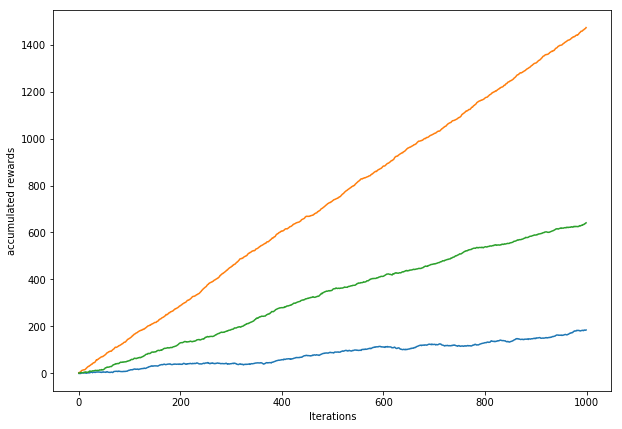

In [3]:
# K = 100 , epsilon = 1, c = 1, op_init = 0
p0 = UCB(100, 1, 1, 0)

# K = 100 , epsilon = 0.1 c = 1, op_init = 0
p1 = UCB(100, 0.1, 1, 0)

# K = 100 , epsilon = 0.01, c = 1, op_init = 0
p2 = UCB(100, 0.01, 1, 0)

for i in range(1000):
    p0.play(i)
    p1.play(i)
    p2.play(i)
    
plt.figure(figsize=(10, 7))   
p0.plot_rewards()
p1.plot_rewards()
p2.plot_rewards()
